# S4: celling cell analysis

In [1]:
%%capture

# settings
wkdir, s3dir = '/home/ubuntu/data/DL20181011_melanocyte_test_data', 'daniel.le-work/MEL_project'

%reload_ext autoreload
%autoreload 2
from scanpy_helpers_1 import *
from scanpy_helpers_2 import *
warnings.filterwarnings('ignore')
%matplotlib inline

# import data from s3
for file in ['raw_adata', 
             'full_adata',
             'DE_df',
            ]:
#     ! aws s3 cp s3://{s3dir}/{file}.p {wkdir}/
    var = pickle.load((open(f'{wkdir}/{file}.p', 'rb')))
    exec(f'{file} = var')
    del var
    
usable_cores = multiprocessing.cpu_count()-1

# update subtypes
full_adata.obs['subtypes'] = ['follicular' if x in ['light_foll_mel', 'dark_foll_mel', 'cyc_foll_mel'] \
                         else y \
                         for x,y in zip(full_adata.obs.class_1, full_adata.obs.subtypes)]

# label order
dev_stage_order = ['fet','neo','adt']
subtypes_order = ['cutaneous','acral','foreskin','follicular']
acral_subtype_order = ['acral','not_acral']
foreskin_subtype_order = ['foreskin','not_foreskin']
follicular_subtype_order = ['follicular','not_follicular']
dev_subtype_order = ['fet_acral','fet_cutaneous','fet_follicular','neo_foreskin','adt_acral','adt_cutaneous']

# create class_2 for site granularity
full_adata.obs['class_2'] = [x if x not in ['mel'] \
                             else f'{y}_mel'
                             for x,y in zip(full_adata.obs['class_1'], full_adata.obs['subtypes'])]

# create class_3 for site+dev_stage granularity
full_adata.obs['class_3'] = [x if not x.endswith('_mel') or x.startswith('cyc_') \
                             else f'{y}_{x}'
                             for x,y in zip(full_adata.obs['class_2'], full_adata.obs['dev_stage'])]

# update class_1 to pool by cell type
full_adata.obs['class_1'] = [x if not x.endswith('_mel') \
                             else 'mel' if not x.startswith('cyc_') \
                             else 'cyc_mel' \
                             for x in full_adata.obs['class_1']]
type_order_1 = ['mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]
    
DE_df['class_1'] = (DE_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order_1, ordered=True))
                     )
DE_df = DE_df.dropna()

type_order_2 = ['light_foll_mel',
                'dark_foll_mel',
                'foreskin_mel',
                'acral_mel',
                'cutaneous_mel',
                'cyc_foll_mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

type_order_3 = ['adt_cutaneous_mel',
                'adt_acral_mel',
                'neo_foreskin_mel',
                'fet_cutaneous_mel',
                'fet_acral_mel',
                'fet_dark_foll_mel',
                'fet_light_foll_mel',][::-1] + \
                ['cyc_mel',
                'cyc_foll_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

color_code_dict = {'dendritic':'#b99abf',
                   'cyc_dendritic':'#9abfb9',
                   'eccrine':'#CBB7E3',
                   'cyc_eccrine':'#b7e3cb',
                   'krt':'#E9E1F2',
                   'cyc_krt':'#e1f2e9',
                   'mast':'#AE90C2',
                   'T_cell':'#5F3D68',
                   'mel':'#000000',
                   'cyc_mel':'#999999',
                   'cutaneous_mel':'#FF0000',
                   'cutaneous':'#FF0000',
                   'leg':'#FF0000',
                   'arm':'#FF0000',
                   'acral_mel':'#0000FF',
                   'acral':'#0000FF',
                   'palm':'#0000FF',
                   'sole':'#0000FF',
                   'foreskin_mel':'#FFA500',
                   'foreskin':'#FFA500',
                   'dark_foll_mel':'#003300',
                   'light_foll_mel':'#99cc99',
                   'follicular':'#008000',
                   'hair_follicle':'#008000',
                   'fet_cutaneous_mel':'#ff4c4c',
                   'adt_cutaneous_mel':'#b20000',
                   'shallow_regime':'#b20000',
                   'steep_regime':'#00b2b2',
                   'fet_acral_mel':'#4c4cff',
                   'adt_acral_mel':'#0000b2',
                   'neo_foreskin_mel':'#FFA500',
                   'fet_dark_foll_mel':'#003300',
                   'fet_light_foll_mel':'#99cc99',
                   'fet':'#dbc2a9',
                   'neo':'#c09569',
                   'adt':'#a5682a',
                   'NTRK2+/HPGD+':'#474747',
                   'NTRK2-/HPGD-':'#DDDDDD',
                   'NTRK2+/HPGD-':'#0000FF',
                   'NTRK2-/HPGD+':'#FF0000',
                   'black':'#000000',
                   'grey':'#D3D3D3',
                   'melanoma':'#935aff',
                   'mel':'#935aff',
                   'follicular_like':'#6514ff',
                   'adult_interfollicular':'#ff1439',
                   'follicular_low':'#ff1439',
                   'interfoll_mel':'#ff1439',
                   'neonatal_interfollicular':'#ffda14',
                   'fetal_interfollicular':'#1439ff',
                   'fetal_follicular':'#39ff14',
                   'follicular_high':'#39ff14',
                   'light_foll_mel':'#39ff14',
                   'dark_foll_mel':'#93ba8b',
                   'norm':'#000000',
                   'cluster_1':'#ff1439',
                   'cluster_0':'#ffda14',
                   'cluster_2':'#39ff14',
                  }
heatmap_cmap = 'jet'


## cycling sore
ref: https://www.biorxiv.org/content/biorxiv/early/2019/02/03/526848.full.pdf 

high = G2/M, low = G1/S

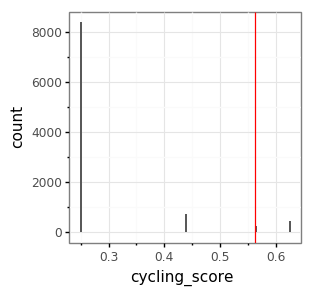

<ggplot: (-9223363267863638987)>

In [3]:
cycling_module = ['TOP2A','CDK1','UBE2C','CDT1'] # 4 genes positively correlate
input_adata = raw_adata
threshold = 95

input_adata.obs['cell'] = input_adata.obs.index.tolist()
input_adata.obs['cell'] = (input_adata
                          .obs['cell']
                          .astype(str)
                          .astype(CategoricalDtype(input_adata.obs['cell'].tolist())))
cat, exp_df = prepare_dataframe(input_adata,
                 var_names = cycling_module,
                 groupby = 'cell')
exp_df = exp_df.rank(pct=True, axis=1, method = 'min') # ranking per cell

input_adata.obs['cycling_score'] = exp_df.loc[:,cycling_module].mean(axis=1)
omit_names = (input_adata[input_adata.obs.cycling_score > np.percentile(input_adata.obs.cycling_score.values, threshold)]
              .obs
              .index
              .tolist()
             )

input_adata.obs['cycling_cell'] = ['G2_M' if x in set(omit_names) else 'G1_S' for x in input_adata.obs.index]

cycling_df = input_adata.obs.loc[:,['n_genes','cycling_score']]

plotnine.options.figure_size = (3,3)
plot_df = (ggplot(cycling_df)
           + theme_bw()
           + geom_histogram(aes('cycling_score'))
           + geom_vline(aes(xintercept = np.percentile(input_adata.obs.cycling_score.values, threshold)), color = 'red')
          )
plot_df


## UMAP with cycling score

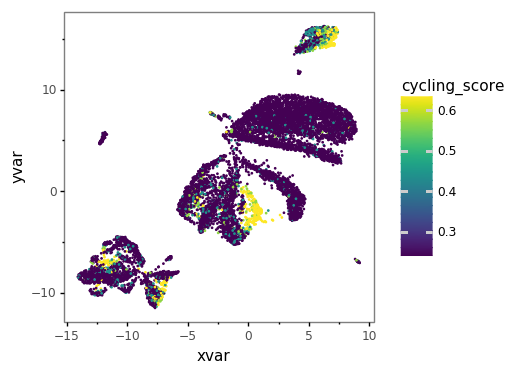

<ggplot: (8789896941011)>


In [3]:
input_adata = full_adata
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df['cycling_score'] = input_adata.obs['cycling_score'].values

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank()
               )
        + geom_point(aes('xvar','yvar',color='cycling_score'), size = 0.1)
       )
print(plot)


## UMAP with binary cycling label

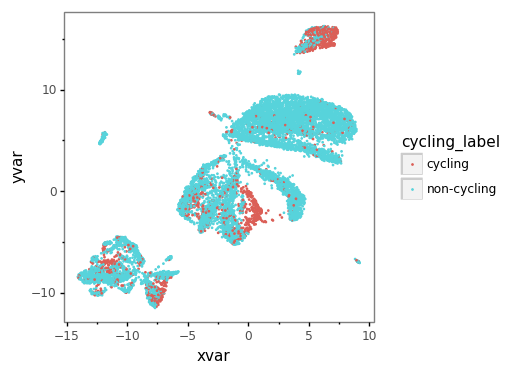

<ggplot: (-9223363246957825462)>


In [4]:
input_adata = full_adata
threshold = 0.95
score_cutoff = np.percentile(raw_adata.obs.cycling_score.values, threshold)

umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df['cycling_score'] = input_adata.obs['cycling_score'].values
umap_df['cycling_label'] = ['cycling' if x>score_cutoff else \
                            'non-cycling' for x in umap_df['cycling_score']]

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank()
               )
        + geom_point(aes('xvar','yvar',color='cycling_label'), size = 0.1)
       )
print(plot)

## Fraction cycling per cell type

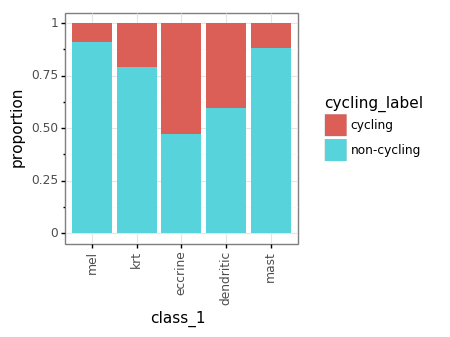

<ggplot: (-9223363247015587647)>

In [5]:
input_adata = full_adata
threshold = 0.95
score_cutoff = np.percentile(raw_adata.obs.cycling_score.values, threshold)

cell_frac_df = input_adata.obs.loc[:,['class_1','cycling_score']]
cell_frac_df['class_1'] = [x[4:] if x.startswith('cyc_') \
                           else x for x in cell_frac_df['class_1']]
cell_frac_df['cycling_label'] = ['cycling' if x>score_cutoff else \
                            'non-cycling' for x in cell_frac_df['cycling_score']]
cell_frac_df = ((pd.DataFrame(cell_frac_df.groupby('class_1')['cycling_label'].value_counts())/\
                pd.DataFrame(cell_frac_df.groupby('class_1')['cycling_label'].count())
               ).rename(columns = {'cycling_label':'proportion'})
                .reset_index()
               )
cell_frac_df['class_1'] = (cell_frac_df['class_1']
                           .astype(str)
                           .astype(CategoricalDtype([x for x in type_order_1 \
                                                     if x in set(cell_frac_df['class_1'])
                                                    ], ordered=True))
                          )
plotnine.options.figure_size = (3,3)
plot = (ggplot(cell_frac_df)
        + theme_bw()
        + theme(axis_text_x = element_text(angle=90))
        + geom_bar(aes('class_1','proportion',fill='cycling_label'), stat='identity')
       )
plot

## cycling cell proportion x age

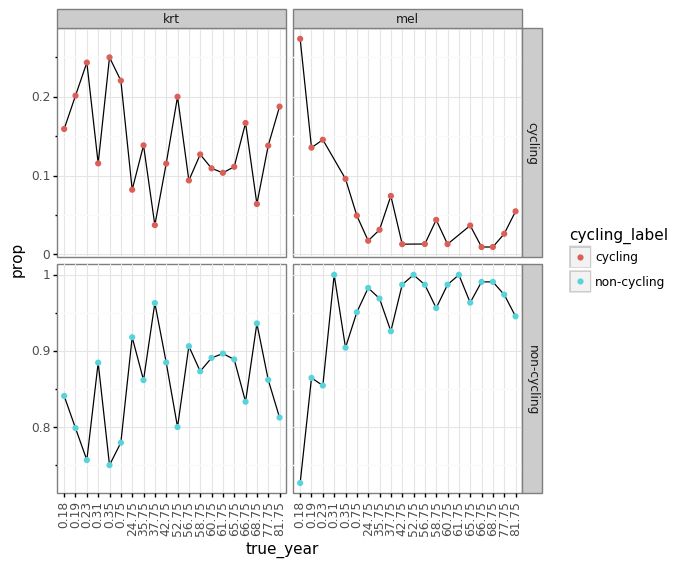

<ggplot: (-9223363247015565596)>

In [6]:
input_adata = full_adata
threshold = 0.95
score_cutoff = np.percentile(raw_adata.obs.cycling_score.values, threshold)

cell_frac_df = input_adata.obs.loc[:,['class_1','true_year','cycling_score']]
cell_frac_df['cycling_label'] = ['cycling' if x>score_cutoff else \
                            'non-cycling' for x in cell_frac_df['cycling_score']]
cell_frac_df = cell_frac_df[[x in ['mel','krt'] for x in cell_frac_df['class_1']]]
cv = pd.DataFrame(cell_frac_df.groupby(['true_year','class_1'])['cycling_label'].value_counts())
cs = pd.DataFrame(cv.groupby(['true_year','class_1'])['cycling_label'].sum())
cell_frac_df = cv/cs
cell_frac_df = (cell_frac_df
                .rename(columns={'cycling_label':'prop'})
                .reset_index()
               )
cell_frac_df['true_year'] = cell_frac_df['true_year'].round(2).astype(str)
order_list = sorted(list(set(cell_frac_df['true_year'])))
cell_frac_df['true_year'] = (cell_frac_df['true_year']
                             .astype(str)
                             .astype(CategoricalDtype(order_list, ordered = True))
                            )
plotnine.options.figure_size = (6,3)
plot = (ggplot(cell_frac_df)
        + theme_bw()
        + theme(axis_text_x = element_text(angle=90),
                aspect_ratio = 1
               )
        + geom_line(aes('true_year','prop',group='cycling_label'))
        + geom_point(aes('true_year','prop',color='cycling_label'))
        + facet_grid('cycling_label~class_1', scales='free')

       )
plot